# Our Approach - Single Queue

In [6]:
import sys
from pathlib import Path
from threading import Thread
import time
import matplotlib.pyplot as plt

# If the notebook is in the "benchmark" directory, which is a sibling to "SingleQueue"
# you can use Path.cwd().parent to get the parent directory
project_directory = Path.cwd().parent
# Add the parent directory to sys.path to access modules from SingleQueue
sys.path.insert(0, str(project_directory))
from SingleQueue.client import Client
from SingleQueue.server import Server

In [7]:
def start_server(server_instance):
    server_instance.run()
    
# Start the server thread
server = Server()
server_thread = Thread(target=start_server, args=(server,))  # Notice the comma in the tuple
server_thread.daemon = True  # This will allow the program to exit even if the thread is still running
server_thread.start()
# Ensure the server has time to start up
time.sleep(1)  # Adjust this based on how long your server takes to star

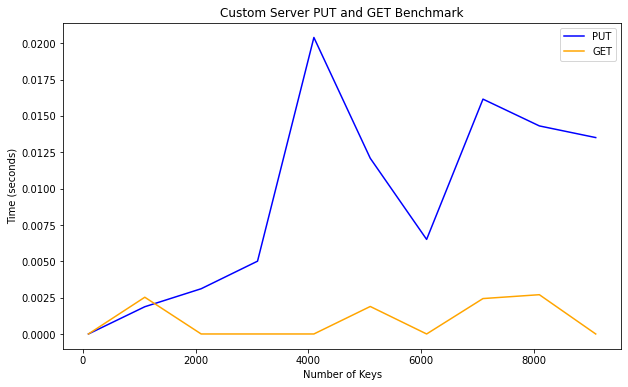

In [14]:

# Range of number of keys to use for the benchmark (from 100 to 10000 with a step of 1000)
num_keys_range = range(100, 10001, 1000)

# Lists to store the execution times for PUT and GET operations
put_times = []
get_times = []

# Loop through different numbers of keys
for num_keys in num_keys_range:
    keys = [f'key{i}' for i in range(1, num_keys + 1)]

    # Benchmark PUT operation
    start_time = time.time()
    for key in keys:
        server.put(0,key, b'value')
    end_time = time.time()
    put_time = end_time - start_time
    put_times.append(put_time)

    # Benchmark GET operation
    start_time = time.time()
    for key in keys:
        server.get(0,key)
    end_time = time.time()
    get_time = end_time - start_time
    get_times.append(get_time)


# Plot PUT and GET operations on the same graph
plt.figure(figsize=(10, 6))
plt.plot(num_keys_range, put_times, label='PUT', color='blue')
plt.plot(num_keys_range, get_times, label='GET', color='orange')
plt.xlabel('Number of Keys')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Custom Server PUT and GET Benchmark')
plt.show()


#  Redis

In [ ]:
import redis
import time
import matplotlib.pyplot as plt

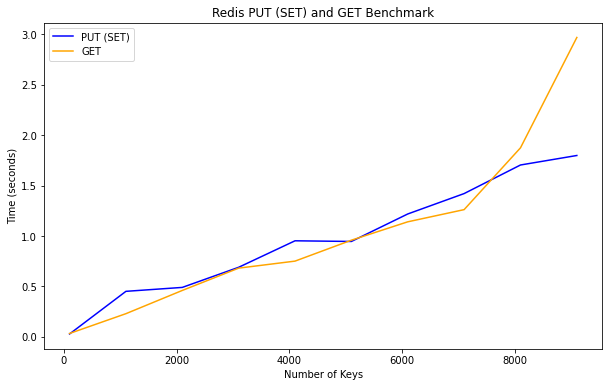

In [8]:
# Initialize a connection to the Redis server
redis_client = redis.StrictRedis(host='localhost', port=6379, db=0)

# Range of number of keys to use for the benchmark (from 100 to 10000 with a step of 1000)
num_keys_range = range(100, 10001, 1000)

# Lists to store the execution times for PUT (SET) and GET operations
put_times = []
get_times = []

# Loop through different numbers of keys
for num_keys in num_keys_range:
    keys = [f'key{i}' for i in range(1, num_keys + 1)]

    # Benchmark PUT (SET) operation
    start_time = time.time()
    for key in keys:
        redis_client.set(key, 'value')
    end_time = time.time()
    put_time = end_time - start_time
    put_times.append(put_time)

    # Benchmark GET operation
    start_time = time.time()
    for key in keys:
        redis_client.get(key)
    end_time = time.time()
    get_time = end_time - start_time
    get_times.append(get_time)

# Plot PUT (SET) and GET operations on the same graph
plt.figure(figsize=(10, 6))
plt.plot(num_keys_range, put_times, label='PUT (SET)', color='blue')
plt.plot(num_keys_range, get_times, label='GET', color='orange')
plt.xlabel('Number of Keys')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Redis PUT (SET) and GET Benchmark')
plt.show()

# Memcache

In [9]:
!pip install python-memcached

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import memcache
import time
import matplotlib.pyplot as plt

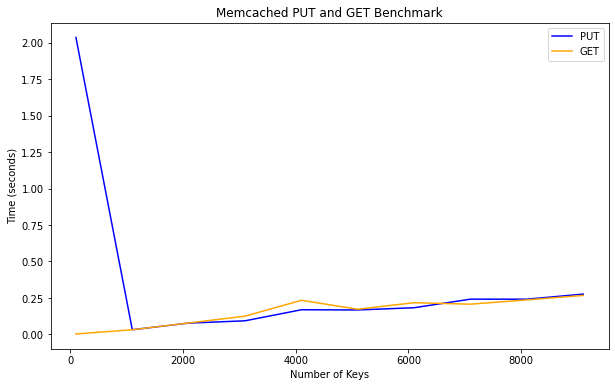

In [12]:
# Initialize a connection to the Memcached server
memcached_client = memcache.Client(['localhost:11211'])

# Range of number of keys to use for the benchmark (from 100 to 10000 with a step of 1000)
num_keys_range = range(100, 10001, 1000)

# Lists to store the execution times for PUT and GET operations
put_times = []
get_times = []

# Loop through different numbers of keys
for num_keys in num_keys_range:
    keys = [f'key{i}' for i in range(1, num_keys + 1)]

    # Benchmark PUT operation
    start_time = time.time()
    for key in keys:
        memcached_client.set(key, 'value')
    end_time = time.time()
    put_time = end_time - start_time
    put_times.append(put_time)

    # Benchmark GET operation
    start_time = time.time()
    for key in keys:
        memcached_client.get(key)
    end_time = time.time()
    get_time = end_time - start_time
    get_times.append(get_time)

# Plot PUT and GET operations on the same graph
plt.figure(figsize=(10, 6))
plt.plot(num_keys_range, put_times, label='PUT', color='blue')
plt.plot(num_keys_range, get_times, label='GET', color='orange')
plt.xlabel('Number of Keys')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Memcached PUT and GET Benchmark')
plt.show()

# Zookeeper

In [1]:
!pip install kazoo

In [62]:
import time
import logging
from kazoo.client import KazooClient
import matplotlib.pyplot as plt

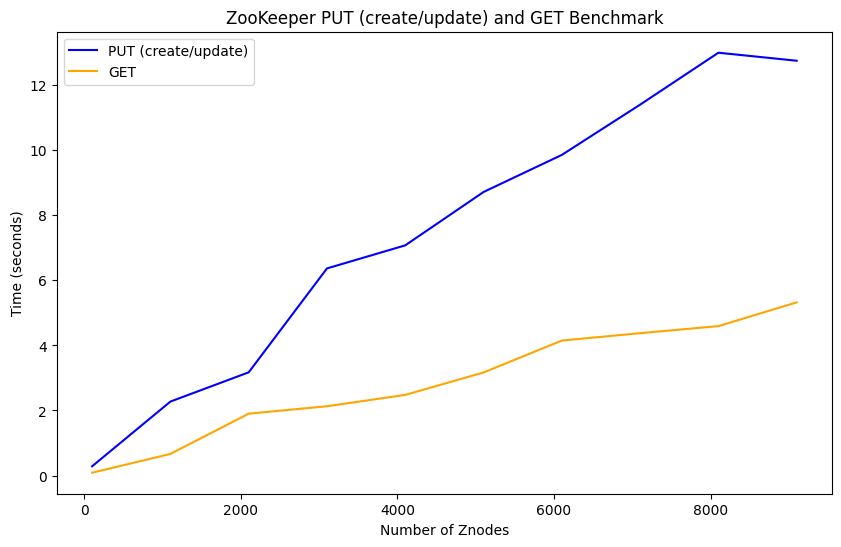

In [63]:
logging.basicConfig(level=logging.ERROR)

# Initialize a connection to the ZooKeeper server
zk = KazooClient(hosts='localhost:2181')
zk.start()

# Ensure that the parent path '/test' exists
zk.ensure_path('/test')

# Range of number of znodes to use for the benchmark (from 100 to 10000 with a step of 1000)
num_znodes_range = range(100, 10001, 1000)

# Lists to store the execution times for PUT (create) and GET operations
put_times = []
get_times = []

# Loop through different numbers of znodes
for num_znodes in num_znodes_range:
    znodes = [f'/test/znode{i}' for i in range(1, num_znodes + 1)]

    # Benchmark PUT (create) operation
    start_time = time.time()
    for znode in znodes:
        try:
            if not zk.exists(znode):
                zk.create(znode, b'value')
            else:
                zk.set(znode, b'value')  # Update the znode if it already exists
        except Exception as e:
            logging.error(f"An error occurred during 'put' operation for {znode}: {str(e)}")
    end_time = time.time()
    put_time = end_time - start_time
    put_times.append(put_time)

    # Benchmark GET operation
    start_time = time.time()
    for znode in znodes:
        try:
            zk.get(znode)
        except Exception as e:
            logging.error(f"An error occurred during 'get' operation for {znode}: {str(e)}")
    end_time = time.time()
    get_time = end_time - start_time
    get_times.append(get_time)


In [ ]:
# In the context of this benchmarking script, the number of znodes corresponds to the concept of "keys" in a key-value store like Redis. Each znode's path (like /test/znode1, /test/znode2, etc.) acts as a unique identifier, similar to a key in a key-value pair. The data you're storing in each znode (b'value') is the value associated with that key.

# To elaborate:

# In Redis: You have keys and values. The command SET key value is used to store a value under a specific key.
# In ZooKeeper: You have znodes and data associated with those znodes. The method zk.create(znode, data) is used to create a znode with the specified path and store data in it. If the znode already exists, you use zk.set(znode, data) to update the data associated with that znode.
# For benchmarking purposes, you're comparing the performance of setting/getting data in Redis with creating/getting znodes in ZooKeeper. So, when you refer to "Number of Znodes" in the ZooKeeper context, it's analogous to "Number of Keys" in the Redis context.